<a href="https://colab.research.google.com/github/Bmartins25/Redes_Neurais_Modelos/blob/main/Bruno_VGG_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow
from keras.optimizers import SGD
from keras import regularizers

In [2]:
from __future__ import print_function
import keras
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from PIL import Image
import cv2
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 32, 32

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
X_train = []
X_test = []
for i in range(len(x_train)):
  X_train.append(cv2.resize(x_train[i], (32,32)))

for i in range(len(x_test)):
  X_test.append(cv2.resize(x_test[i], (32,32)))

X_train = numpy.asarray(X_train)
X_test = numpy.asarray(X_test)

11490434/11490434 [==============================] - 2s 0us/step


In [3]:
if K.image_data_format() == 'channels_first':
    x_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    x_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    x_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

#Convert to float and then normalize the images by dividing by 255(max value of a pixel)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


x_train shape: (60000, 32, 32, 1)
60000 train samples
10000 test samples


In [4]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [5]:
#We add regularization constant of 0.001  (L2 regularization)
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=input_shape,kernel_regularizer=regularizers.l2(0.01), padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides = (2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.001), padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides = (2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.001 ), padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.001 ), padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides = (2, 2)))
model.add(Conv2D(512, (3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.001 ), padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.001 ), padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides = (2, 2)))
model.add(Conv2D(512, (3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.001), padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.001), padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides = (2, 2)))
model.add(Flatten())
model.add(Dense(4096, activation='relu',kernel_regularizer=regularizers.l2(0.001 )))
model.add(Dense(4096, activation='relu',kernel_regularizer=regularizers.l2(0.001 )))
model.add(Dense(512, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(10, activation='softmax', kernel_regularizer=regularizers.l2(0.001)))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 256)         295168    
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 256)         5

In [6]:
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [8]:
history = model.fit(x_train, y_train, batch_size=32, validation_data=(x_test,y_test), epochs=5, verbose=1)

Epoch 1/5
1875/1875 [==============================] - 47s 25ms/step - loss: 6.3555 - accuracy: 0.1115 - val_loss: 5.0234 - val_accuracy: 0.1028
Epoch 2/5
1875/1875 [==============================] - 46s 24ms/step - loss: 4.2181 - accuracy: 0.1103 - val_loss: 3.5895 - val_accuracy: 0.1135
Epoch 3/5
1875/1875 [==============================] - 46s 24ms/step - loss: 3.2089 - accuracy: 0.1117 - val_loss: 2.9117 - val_accuracy: 0.1135
Epoch 4/5
1875/1875 [==============================] - 48s 25ms/step - loss: 2.7319 - accuracy: 0.1114 - val_loss: 2.5904 - val_accuracy: 0.1135
Epoch 5/5
1875/1875 [==============================] - 46s 25ms/step - loss: 2.5060 - accuracy: 0.1107 - val_loss: 2.4403 - val_accuracy: 0.1135


In [9]:
score = model.evaluate(x_test, y_test, batch_size=32)
print(score)

313/313 [==============================] - 2s 7ms/step - loss: 2.4403 - accuracy: 0.1135
[2.4402623176574707, 0.11349999904632568]


In [19]:
print("History", history.history)
print("history.history.keys():", history.history.keys())

History {'loss': [6.355539798736572, 4.218118667602539, 3.208925724029541, 2.731916666030884, 2.505986452102661], 'accuracy': [0.11148333549499512, 0.11029999703168869, 0.11174999922513962, 0.1113833338022232, 0.11068333685398102], 'val_loss': [5.023425579071045, 3.5895321369171143, 2.9116921424865723, 2.5903823375701904, 2.4402623176574707], 'val_accuracy': [0.10279999673366547, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568]}
history.history.keys(): dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


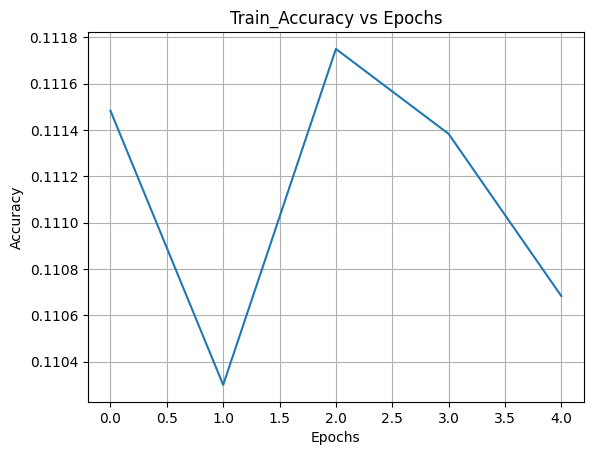

In [25]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('Train_Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.grid()
plt.show()

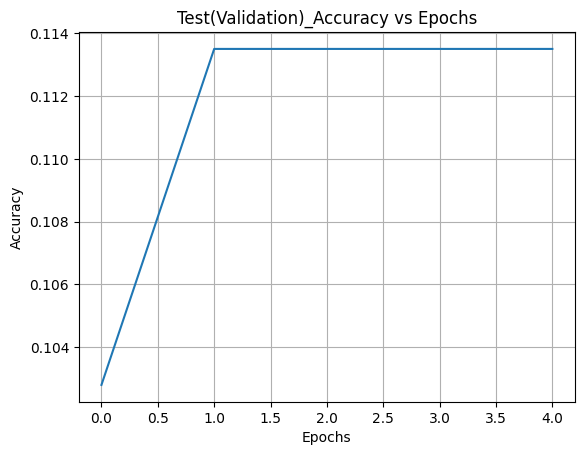

In [26]:
plt.plot(history.history['val_accuracy'])
plt.title('Test(Validation)_Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.grid()
plt.show()

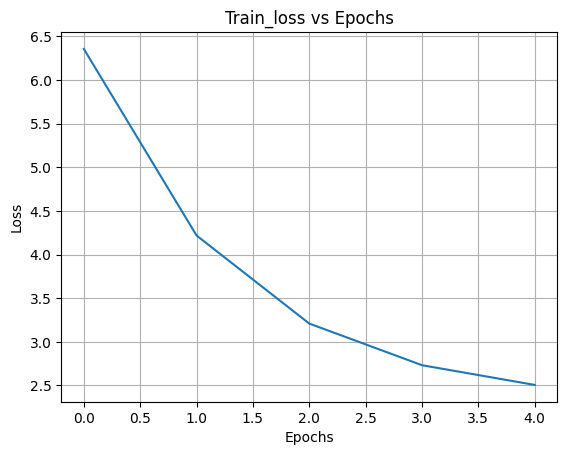

In [27]:
plt.plot(history.history['loss'])
plt.title('Train_loss vs Epochs')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.grid()
plt.show()

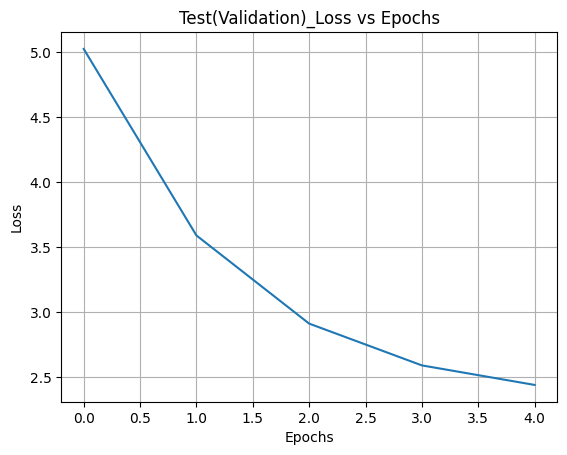

In [28]:
plt.plot(history.history['val_loss'])
plt.title('Test(Validation)_Loss vs Epochs')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.grid()
plt.show()

In [ ]:
s_loss = []
s_acc = []
for j in range(-45,50,5):
  rotate_test_x = []
  for i in range(len(X_test)):
    X_test_rotate = Image.fromarray(X_test[i])
    new_image = X_test_rotate.rotate(j)
    img_array = numpy.array(new_image)
    rotate_test_x.append(img_array)
  X_test_rotate = numpy.asarray(rotate_test_x)
  X_test_rotate = X_test_rotate.reshape(X_test_rotate.shape[0], img_rows, img_cols, 1)
  score = model.evaluate(X_test_rotate, y_test, batch_size=32)
  print("Rotation degree: " +str(j) + " Score:" + str(score))
  s_loss.append(score[0])
  s_acc.append(score[1])

10000/10000 [==============================] - 5s 536us/step
Rotation degree: -45 Score:[8.439601834869384, 0.4814]
10000/10000 [==============================] - 5s 522us/step
Rotation degree: -40 Score:[6.714005543899536, 0.589]
10000/10000 [==============================] - 5s 525us/step
Rotation degree: -35 Score:[5.110840104818344, 0.6889]
10000/10000 [==============================] - 5s 518us/step
Rotation degree: -30 Score:[3.5404354447841646, 0.7866]
10000/10000 [==============================] - 5s 519us/step
Rotation degree: -25 Score:[2.244192848205566, 0.8678]
10000/10000 [==============================] - 5s 518us/step
Rotation degree: -20 Score:[1.3582411518096924, 0.9232]
10000/10000 [==============================] - 5s 519us/step
Rotation degree: -15 Score:[0.8178639618635177, 0.9572]
10000/10000 [==============================] - 5s 521us/step
Rotation degree: -10 Score:[0.5553975246191025, 0.9734]
10000/10000 [==============================] - 5s 519us/step
Rotation

In [ ]:
s_loss

[8.439601834869384,
 6.714005543899536,
 5.110840104818344,
 3.5404354447841646,
 2.244192848205566,
 1.3582411518096924,
 0.8178639618635177,
 0.5553975246191025,
 0.4584701637506485,
 0.39120862691402436,
 0.47080748364925384,
 0.5828770918130874,
 0.7753211725950241,
 1.1575856167793275,
 1.7821538168430329,
 2.70450921125412,
 4.016278053951264,
 5.466768901395798,
 6.93717942314148]

In [ ]:
s_acc

[0.4814,
 0.589,
 0.6889,
 0.7866,
 0.8678,
 0.9232,
 0.9572,
 0.9734,
 0.9797,
 0.9839,
 0.9792,
 0.9721,
 0.9597,
 0.9361,
 0.8962,
 0.8389,
 0.7577,
 0.6661,
 0.5757]

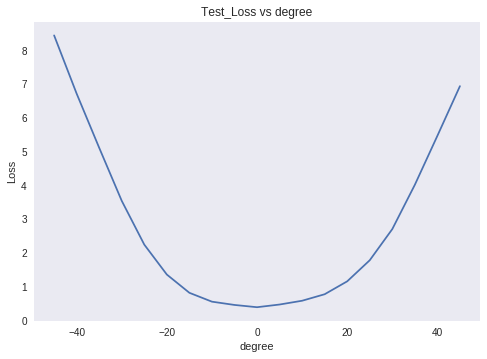

In [ ]:
plt.plot( range(-45,50,5), s_loss)
plt.title('Test_Loss vs degree')
plt.ylabel('Loss')
plt.xlabel('degree')
plt.grid()
plt.show()

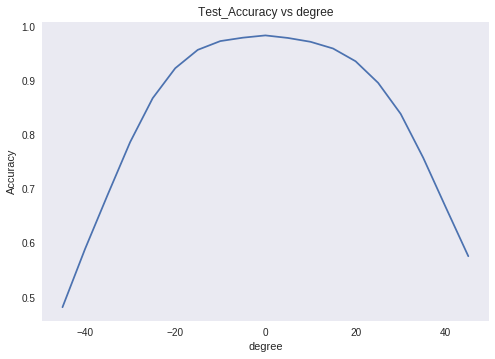

In [ ]:
plt.plot( range(-45,50,5), s_acc)
plt.title('Test_Accuracy vs degree')
plt.ylabel('Accuracy')
plt.xlabel('degree')
plt.grid()
plt.show()

In [ ]:
from PIL import ImageFilter
s_loss = []
s_acc = []
for j in range(0,7):
  filter_test_x = []
  for i in range(len(X_test)):
    X_test_filter = Image.fromarray(X_test[i])
    new_image = X_test_filter.filter(ImageFilter.GaussianBlur(radius=j))
    img_array = numpy.array(new_image)
    filter_test_x.append(img_array)
  X_test_filter = numpy.asarray(filter_test_x)
  X_test_filter = X_test_filter.reshape(X_test_filter.shape[0], img_rows, img_cols, 1)
  score = model.evaluate(X_test_filter, y_test, batch_size=32)
  print("Filter radius: " +str(j) + " Score:" + str(score))
  s_loss.append(score[0])
  s_acc.append(score[1])

10000/10000 [==============================] - 5s 536us/step
Filter radius: 0 Score:[0.39120862691402436, 0.9839]
10000/10000 [==============================] - 5s 519us/step
Filter radius: 1 Score:[0.4019737101793289, 0.9835]
10000/10000 [==============================] - 5s 523us/step
Filter radius: 2 Score:[0.6802522034883499, 0.965]
10000/10000 [==============================] - 5s 521us/step
Filter radius: 3 Score:[2.888186405754089, 0.82]
10000/10000 [==============================] - 5s 519us/step
Filter radius: 4 Score:[7.416354692077637, 0.529]
10000/10000 [==============================] - 5s 521us/step
Filter radius: 5 Score:[10.558487956237792, 0.3178]
10000/10000 [==============================] - 5s 519us/step
Filter radius: 6 Score:[12.295349296569825, 0.1799]


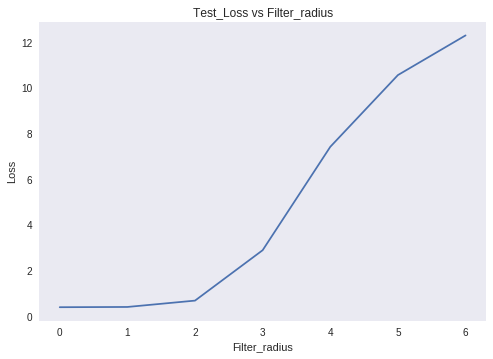

In [ ]:
plt.plot( range(0,7), s_loss)
plt.title('Test_Loss vs Filter_radius')
plt.ylabel('Loss')
plt.xlabel('Filter_radius')
plt.grid()
plt.show()

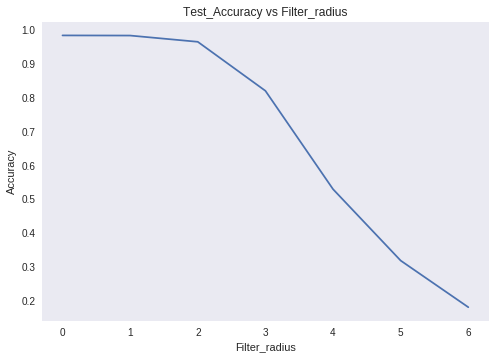

In [ ]:
plt.plot( range(0,7), s_acc)
plt.title('Test_Accuracy vs Filter_radius')
plt.ylabel('Accuracy')
plt.xlabel('Filter_radius')
plt.grid()
plt.show()